# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import shapiro

# Function Definitions

In [2]:
# p - probability to move forward
# N - number of steps
# return[0]: final distance / position of a walker
# return[1]: list of the snapshots of the movement of the walker
def final_position(p: float, N: int ) -> list:
  distance = 0
  steps = [0]
  for i in range(0,N):
    current_step = np.random.choice([-1,1], p = [1-p,p])
    distance +=current_step
    steps.append(current_step + steps[i])
  return [distance, steps]      

In [3]:
#function plots the trajectory of the walker
#steps: list of the snapshots of the movement of the walker
def plot_movement(steps: list) -> None:
  plt.figure(figsize=(17,9)) 
  plt.style.use('seaborn-whitegrid')
  plt.title("Track of drunk walker over {steps} steps with final position at {position}".format(steps=len(steps)-1, position = steps[-1]))
  plt.plot(np.arange(len(steps)), steps, color = "#558271")
  plt.show()

In [4]:
# returns list of the final reacher distances of several drunk walkers
# number_of_repetitions: number of iterations / walkers
def many_walkers(probability: float, steps: int, number_of_repetitions: int ) -> list:
  distances = []
  for i in range(0,number_of_repetitions):
    current_walker_distance = final_position(probability, steps)[0]
    distances.append(current_walker_distance)
  return distances    

In [5]:
# function simply calculates and prints the Standard Deviation and Mean for the given data
def print_std_mean(data: list) -> None:
  std = np.std(data)
  mean = np.mean(data)
  print("Standard deviation = {std} and mean = {mean}".format(std=std, mean=mean))  

In [6]:
#function performs Shapiro - Wilk test and prints whether or not the distribution is normal
def shapiro_test(data) -> None:
  s_test = shapiro(data)
  if(s_test[1] > 0.05):
    print("This is normal distribution as pvalue = {pvalue} is more than alpha = 0.05".format(pvalue = s_test[1]))
  else:
    print("This distribution is not normal as pvalue = {pvalue} is less than alpha = 0.05".format(pvalue = s_test[1]))  

In [7]:
#the function plots the histogram of the distribution along with the graph of the normal distribution for comparison
#data: list for plotting
#title: string for the title of the histogram
def plot_histogram_with_dist(data: list,title: str) -> None:
  plt.figure(figsize=(17,9)) 
  plt.style.use('seaborn-whitegrid')
  plt.hist(data, bins = 15, density=True, alpha=0.7, facecolor = '#689c89', edgecolor='#558271', linewidth = 0.3)
  X_norm = np.linspace(min(data)-10, max(data)+10 , len(data)+20)
  Y_norm = norm.pdf(X_norm, np.mean(data), np.std(data))
  plt.plot(X_norm, Y_norm, color = "black", linewidth = 3)
  plt.title(title) 
  plt.show()

In [8]:
#this function combines functions defined above in order to analyze the distribution for given probability, number of steps and iterations 
#returns the standard deviation 
def analyze_and_return_std(p: float, steps: int, iterations: int) -> float:
  dists = many_walkers(p, steps, iterations)
  print_std_mean(dists)
  shapiro_test(dists)
  plot_histogram_with_dist(dists, "{i} iterations with p = {p} and N = {N}".format(i=iterations, p=p, N=steps))
  return np.std(dists)

# Diffusion in 1 dimension: the drunk walker

Let us consider a drunk walker that moves along in a street (considered as a straight line). At each step, he has a probability 𝑝 to move forward and 1 − 𝑝 to move backward

## Write a function that calculates the final position of the walker as a function of the parameter 𝑝 and the number of steps 𝑁.

## Testing different values

### p = 0, steps = 1000

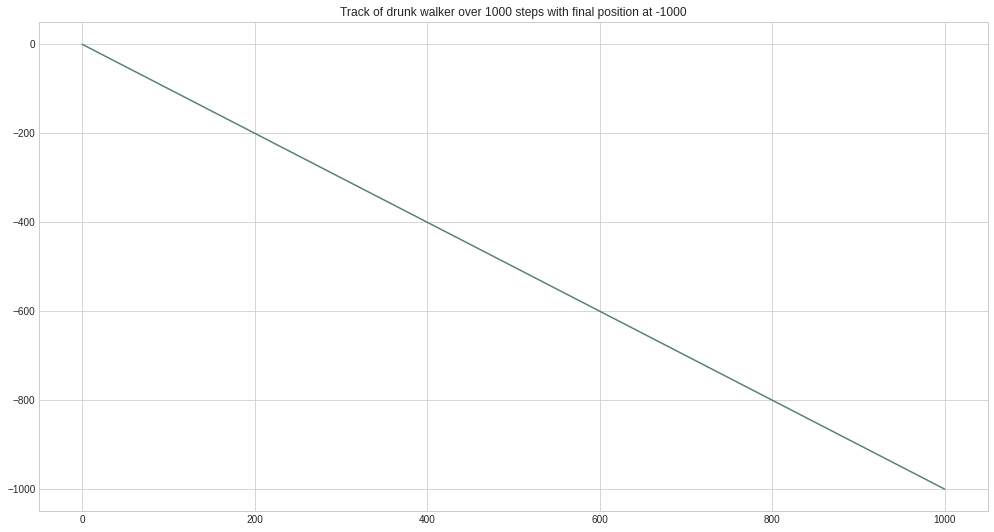

In [9]:
distance, steps = final_position(0, 1000)
plot_movement(steps)

### p = 0.25, steps = 1000

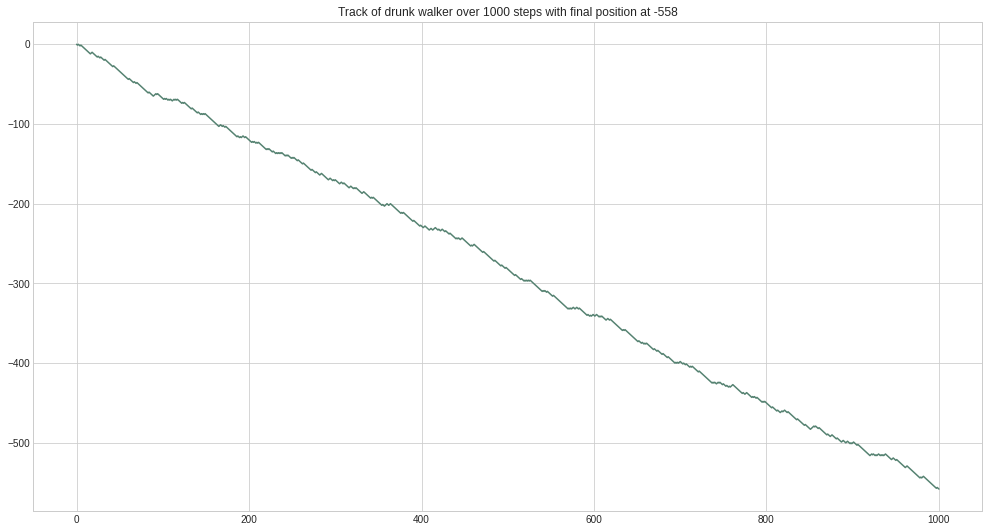

In [10]:
distance, steps = final_position(0.25, 1000)
plot_movement(steps)

### p = 0.5, steps = 1000

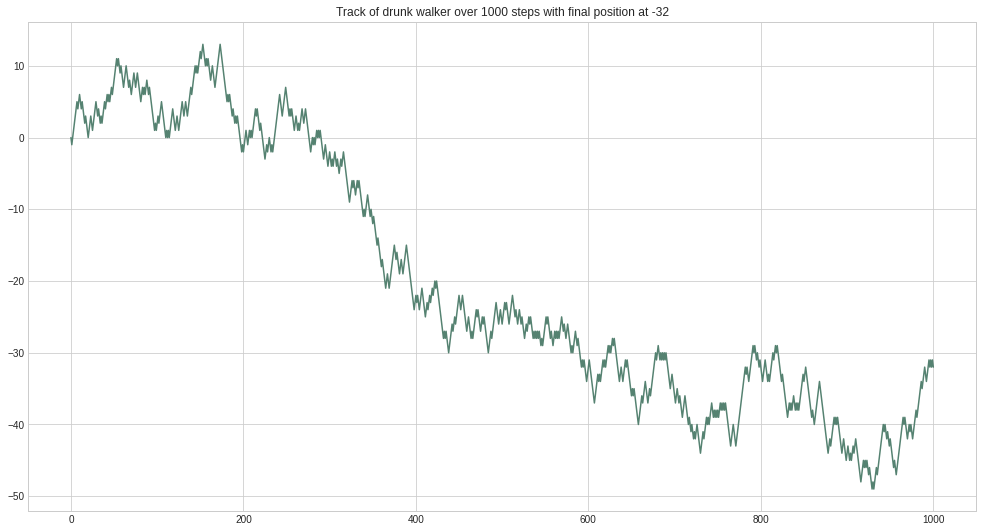

In [11]:
distance, steps = final_position(0.5, 1000)
plot_movement(steps)

### p = 0.75, steps = 1000

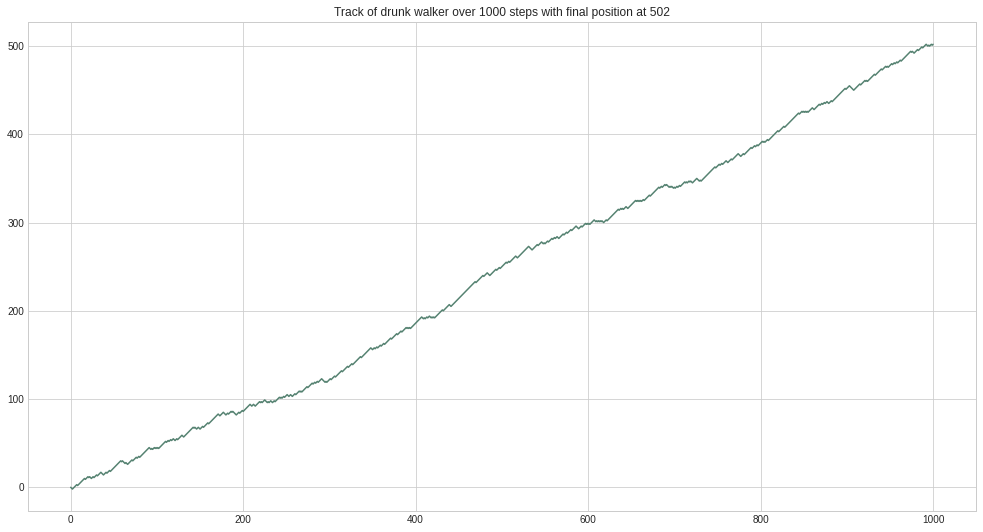

In [12]:
distance, steps = final_position(0.75, 1000)
plot_movement(steps)

### p = 1, steps = 1000

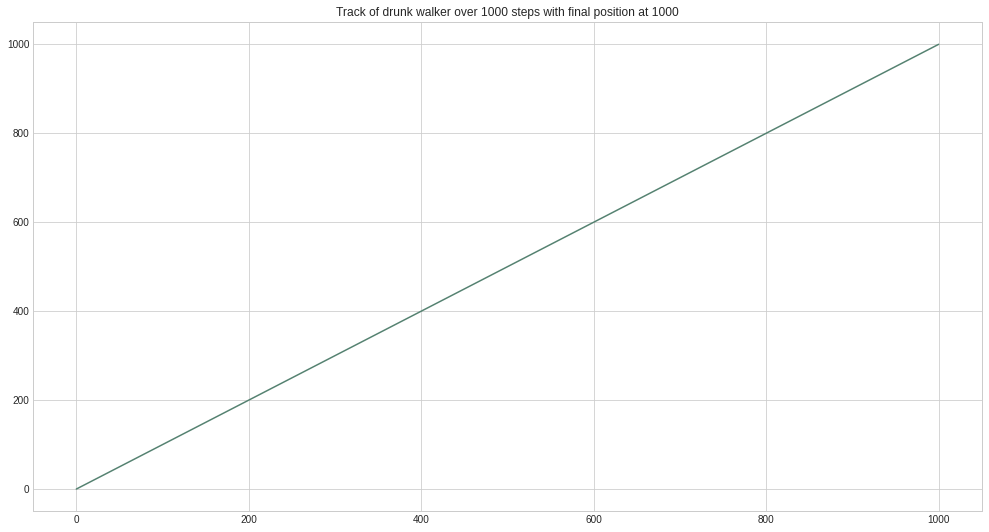

In [13]:
distance, steps = final_position(1, 1000)
plot_movement(steps)

## What is the expected final position for 𝑝 = 0.5? Check your guess by running your function 100 times for 1000 steps.

In [14]:
dists_1000 = many_walkers(0.5, 1000, 100)

## Represent the result as a histogram. Calculate the standard deviation 𝜎1000 and demonstrate that the distribution you obtained is a Gaussian.

In [15]:
print_std_mean(dists_1000)

Standard deviation = 28.048272674088146 and mean = 2.12


#### To demonstrate whether or not the distribution is normal, we can use Shapiro - Wilk test

In [16]:
shapiro_test(dists_1000)

This is normal distribution as pvalue = 0.544940173625946 is more than alpha = 0.05


#### Demonstrating histogram and normality of the distribution

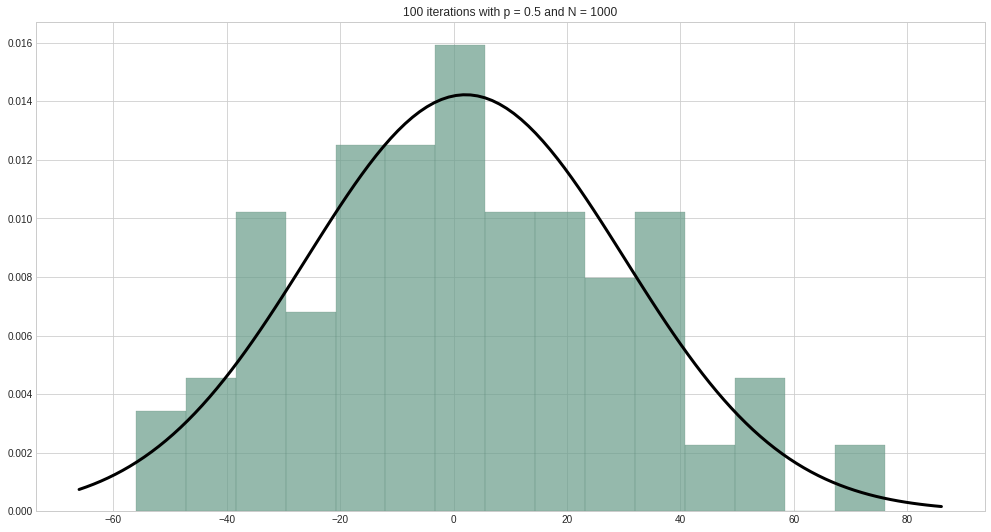

In [17]:
plot_histogram_with_dist(dists_1000, "100 iterations with p = 0.5 and N = 1000")

## Do the same for 20, 50, 100 and 200 steps.



### 20 stesps

In [18]:
stds_05 = []

Standard deviation = 4.5350616313342424 and mean = -0.096
This distribution is not normal as pvalue = 9.179275117787711e-10 is less than alpha = 0.05


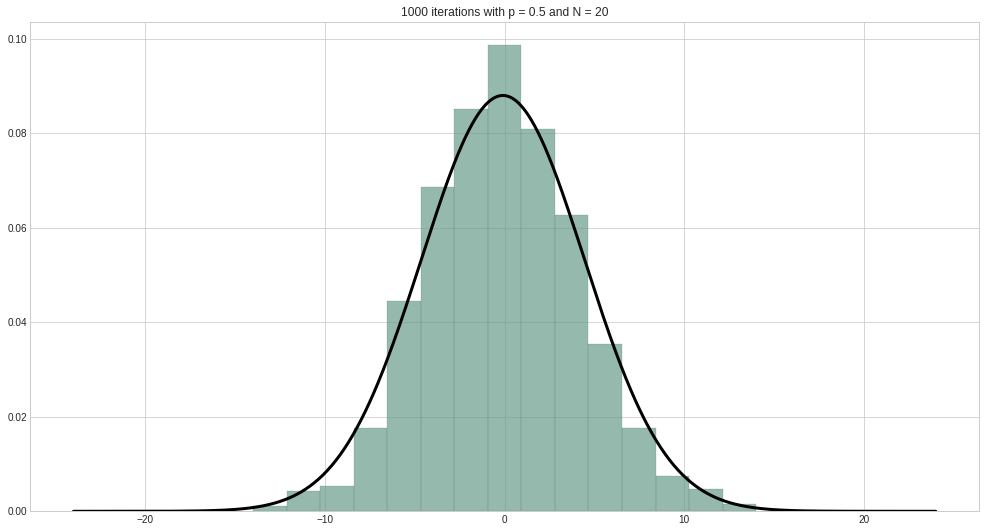

In [19]:
std_20_05 = analyze_and_return_std(0.5,20,1000)
stds_05.append(std_20_05)

### 50 steps

Standard deviation = 7.048006526671212 and mean = -0.098
This distribution is not normal as pvalue = 3.888251376338303e-05 is less than alpha = 0.05


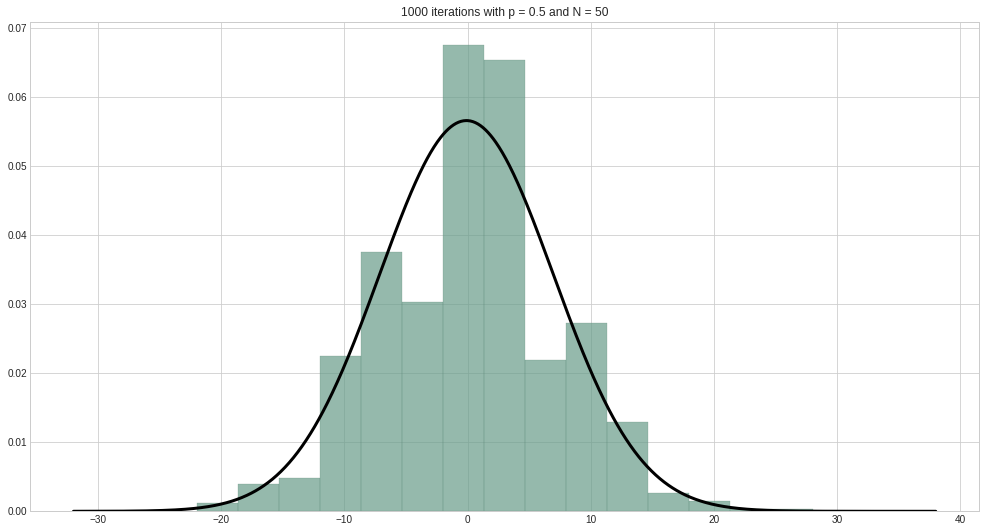

In [20]:
std_50_05 = analyze_and_return_std(0.5,50,1000)
stds_05.append(std_50_05)

### 100 steps

Standard deviation = 9.983085695314852 and mean = -0.5
This distribution is not normal as pvalue = 0.006637927144765854 is less than alpha = 0.05


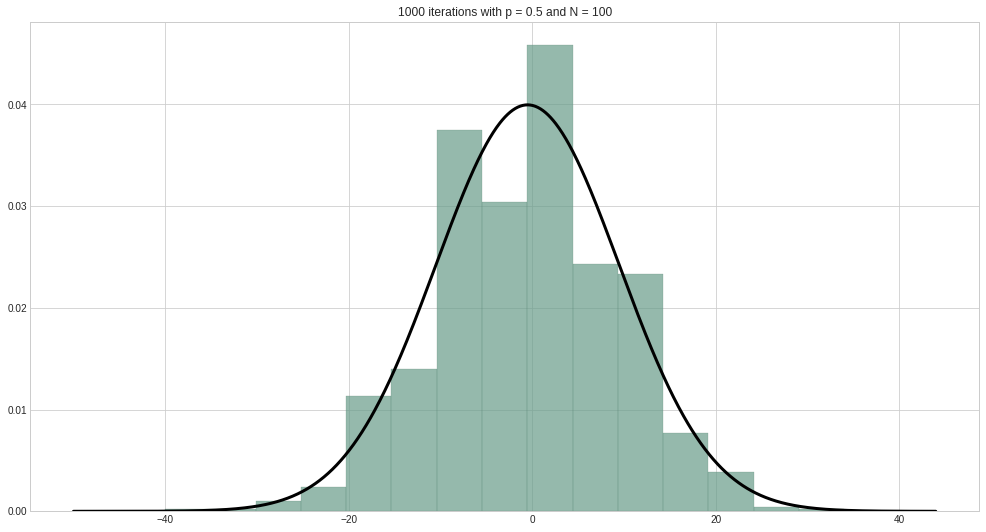

In [21]:
std_100_05 = analyze_and_return_std(0.5,100,1000)
stds_05.append(std_100_05)

### 200 steps

Standard deviation = 13.954751878840412 and mean = 0.33
This is normal distribution as pvalue = 0.050360843539237976 is more than alpha = 0.05


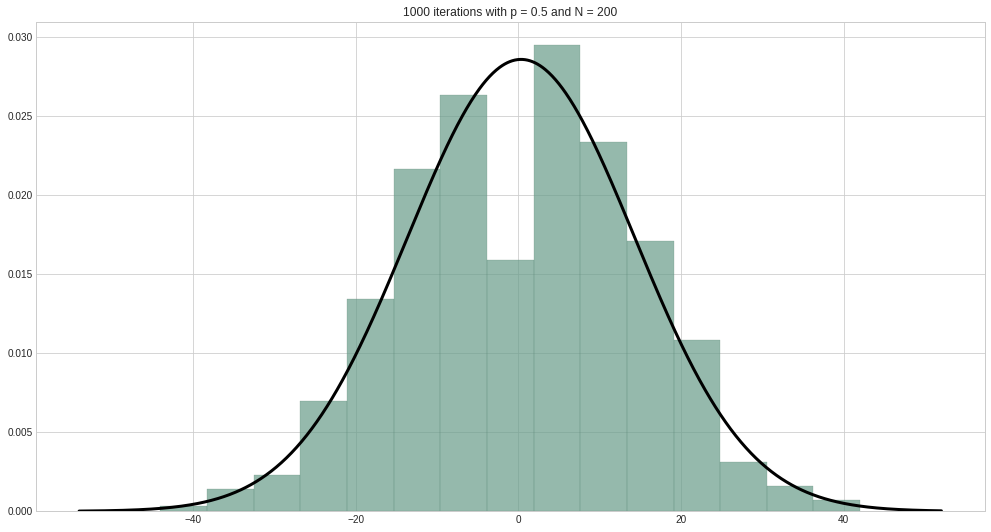

In [22]:
std_200_05 = analyze_and_return_std(0.5,200,1000)
stds_05.append(std_200_05)

# Fit the standard deviation 𝜎𝑁 as a function of the number of steps 𝑁 with appropriate mathematical law.

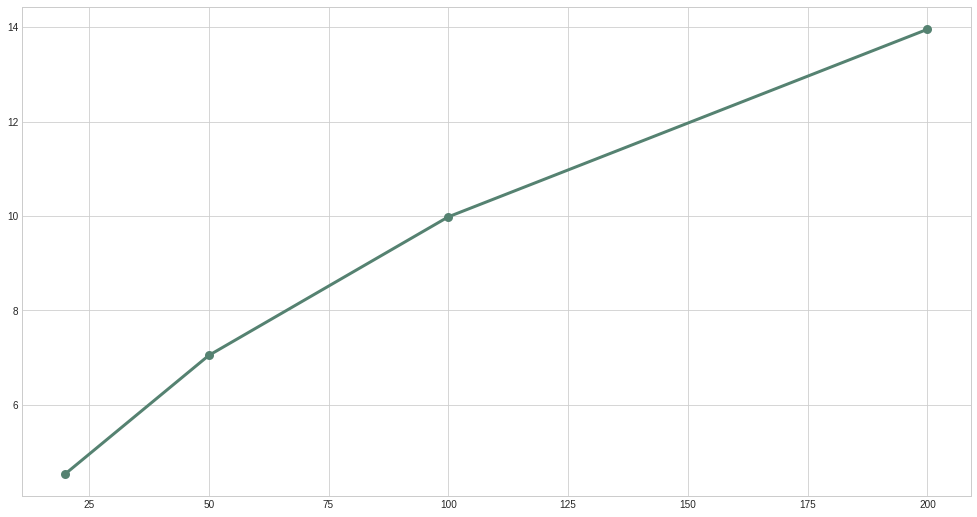

In [23]:
#we can observe that the dependance is linear, that is why we will use linear regression to calculate the coefficients
X = [20, 50, 100, 200]
plt.figure(figsize=(17,9)) 
plt.style.use('seaborn-whitegrid')
plt.plot(X, stds_05, color = "#558271", linewidth = 3)
plt.scatter(X, stds_05, color = "#558271", linewidth = 3)

plt.show()


## Fitting the function

In [24]:
stds = []
steps = np.arange(0,200)
for i in steps:
  dists = many_walkers(0.5, i, 100)
  stds.append(np.std(dists))



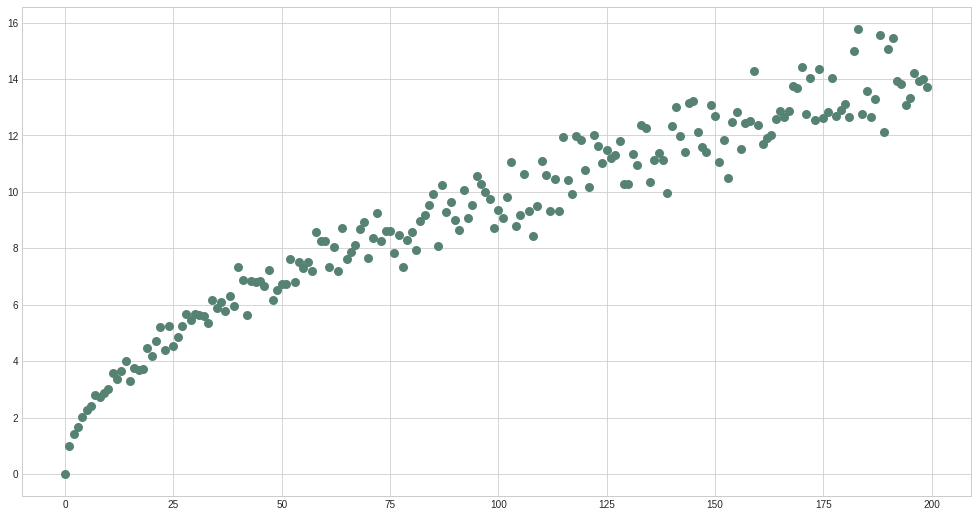

In [25]:
plt.figure(figsize=(17,9)) 
plt.style.use('seaborn-whitegrid')
plt.scatter(steps, stds, color = "#558271", linewidth = 3)
plt.show()

In [26]:
X = np.arange(0,200)
Y = np.sqrt(X)

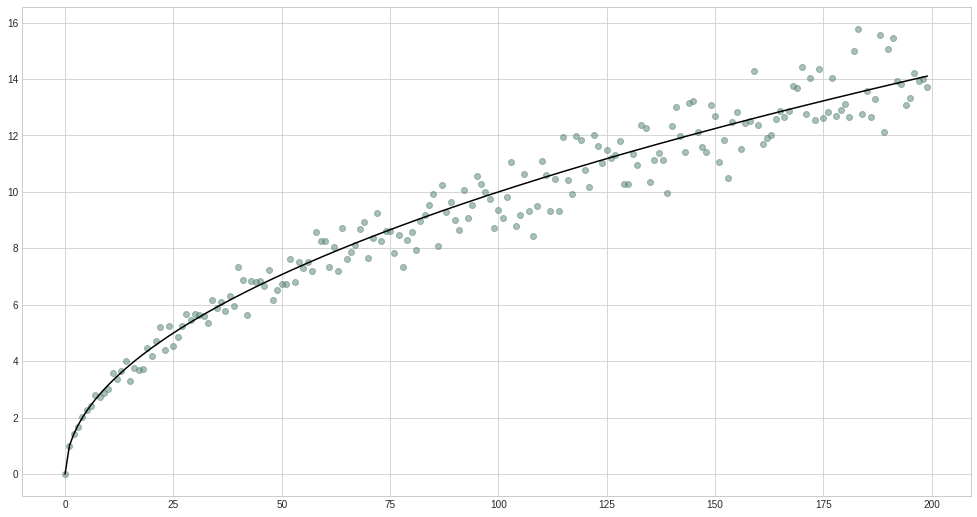

In [27]:
plt.figure(figsize=(17,9)) 
plt.style.use('seaborn-whitegrid')
plt.plot(X, Y, label= "Square root function", color="black")
plt.scatter(steps, stds, label= "Standard deviations", alpha = 0.5, color = "#558271" )

In [28]:
steps = [200, 400, 600, 800, 1000, 1200, 1400]
for i in steps:
  dists = many_walkers(0.5, i, 100)
  print("for N = {i}  Real standard deviation = {real}  predicted by function sqrt(N) = {predicted}".format(i = i, real = np.std(dists), predicted=(i)**(0.5)))

for N = 200  Real standard deviation = 14.214626270148647  predicted by function sqrt(N) = 14.142135623730951
for N = 400  Real standard deviation = 19.639796332956205  predicted by function sqrt(N) = 20.0
for N = 600  Real standard deviation = 22.116961816669125  predicted by function sqrt(N) = 24.49489742783178
for N = 800  Real standard deviation = 28.89491996874191  predicted by function sqrt(N) = 28.284271247461902
for N = 1000  Real standard deviation = 30.96602008654002  predicted by function sqrt(N) = 31.622776601683793
for N = 1200  Real standard deviation = 33.91551857188682  predicted by function sqrt(N) = 34.64101615137755
for N = 1400  Real standard deviation = 33.455259676170506  predicted by function sqrt(N) = 37.416573867739416


# Now 𝑝 = 0.75. What is the expected final position as a function of the number of time steps N. Check your assumption

Standard deviation = 11.037825872879134 and mean = 100.08
This is normal distribution as pvalue = 0.47729000449180603 is more than alpha = 0.05


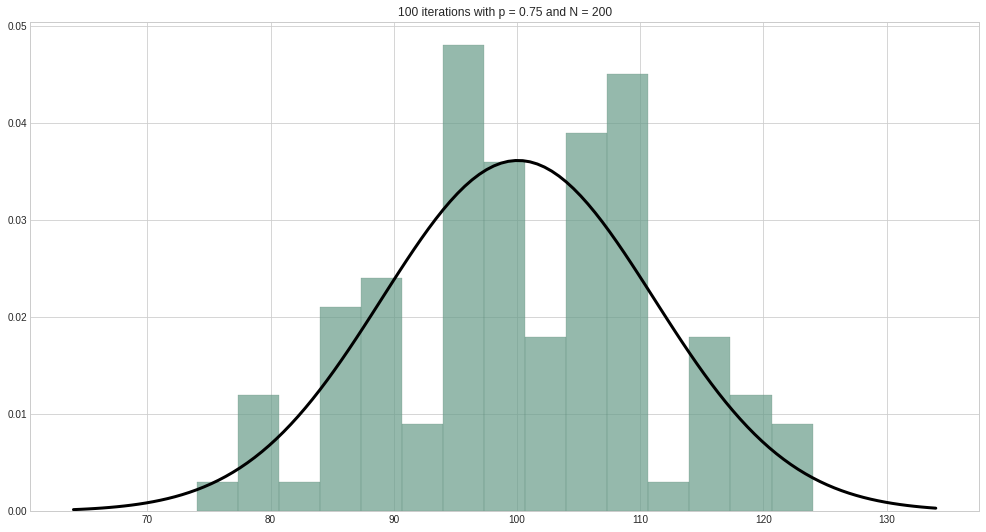

In [29]:
std0 = analyze_and_return_std(0.75,200,100)

Standard deviation = 17.128409149713818 and mean = 247.76
This is normal distribution as pvalue = 0.6330418586730957 is more than alpha = 0.05


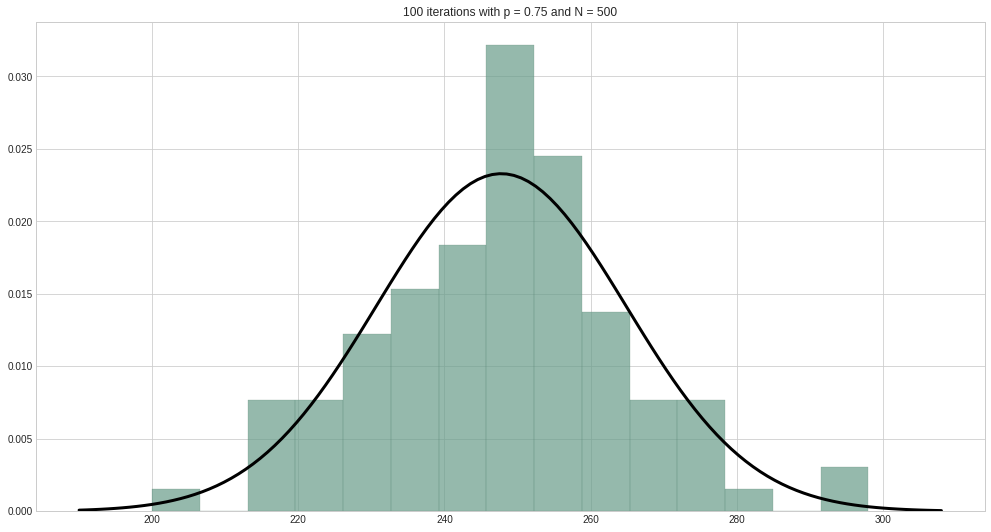

In [30]:
std1 = analyze_and_return_std(0.75,500,100)

Standard deviation = 26.43460610639016 and mean = 498.46
This is normal distribution as pvalue = 0.643074631690979 is more than alpha = 0.05


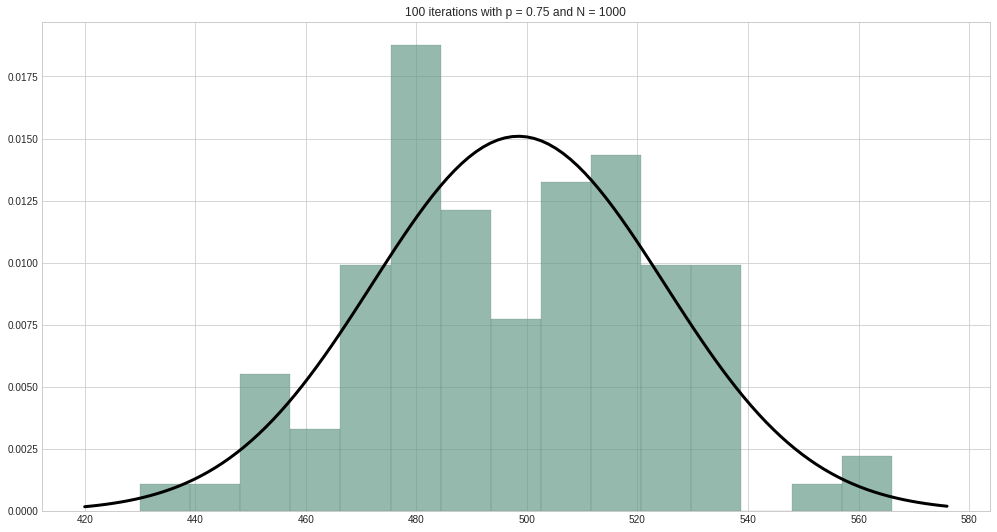

In [31]:
std2 = analyze_and_return_std(0.75,1000,100)

Standard deviation = 28.46468689446627 and mean = 746.04
This is normal distribution as pvalue = 0.3298075795173645 is more than alpha = 0.05


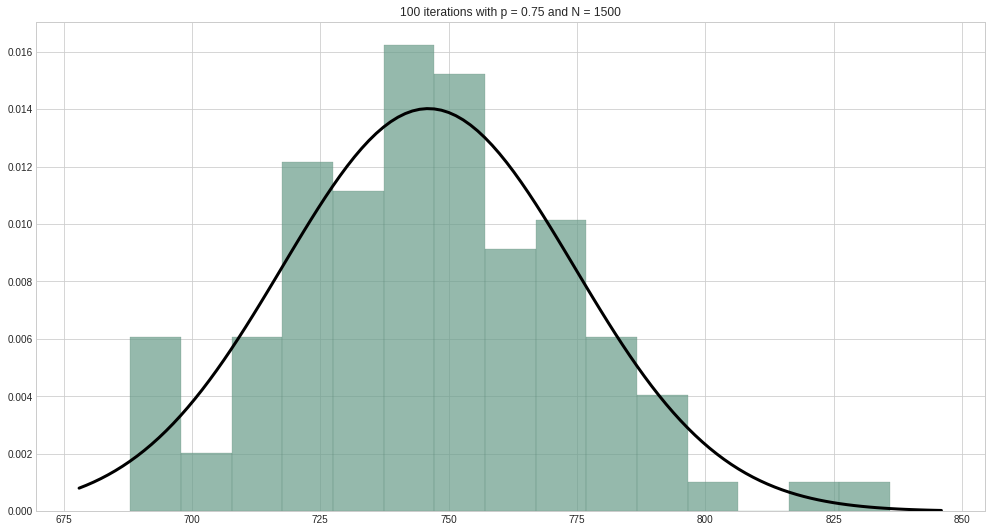

In [32]:
std3 = analyze_and_return_std(0.75,1500,100)

# Diffusion in 2 dimensions: diffusion of a dye in water
In this part, we will simulate the diffusion of a dye drop in a water puddle. 

The water puddle is represented by a lattice of 20 lines and 20 columns. 2D Zero Array  

At the initial time step, box of the lattice is empty, except the four at the center which contains 100 particles of dye. 

At each time step, each molecule moves according to the following rules :

(i) the molecule has a probability 𝑝 to stay in its box,

(ii) if the molecule moves, it moves one box and all possible moving directions are equiprobable (e.g. 0.25 ∙ (1 − 𝑝) to go up, down, left or right if the particle is in the center of the lattice, 0.33 ∙ (1 − 𝑝) to go up, down or left if the particle in is a top-right box of a row, or 0.5 ∙ (1 − 𝑝) to go down or right if the particle is in the
upper left corner box), and

(iii) the molecule can not go out of the lattice.

In [33]:
def move(up, down, left, right):
    return [up, down, left, right]

# pos : position of a particle, array of 2 elements [x, y]
# border : size of the border [x_max, y_max]
# returns possible movement directions of a particle
def possible_movement(pos: list, border: list) -> list:
    if (pos[0] == 0):
        if (pos[1] == 0):
            return move(0, 1, 0, 1)   
        elif (pos[1] == border[1] - 1):
            return move(1, 0, 0, 1)
        else:
            return move(1, 1, 0, 1)
    elif(pos[0] == border[0] - 1):
        if (pos[1] == 0):
            return move(0, 1, 1, 0)
        elif (pos[1] == border[1] - 1):
            return move(1, 0, 1, 0)
        else:
            return move(1, 1, 1, 0)
    else:
        if (pos[1] == 0):
            return move(0, 1, 1, 1)
        elif (pos[1] == border[1] - 1):
            return move(1, 0, 1, 1)
        else:
            return move(1, 1, 1, 1)


In [34]:
# example of the func works
one_dye_cell = [4, 5] # coordinates [x, y]
print(possible_movement(one_dye_cell, [20, 20])) # returned that you can go up, down, left, right

one_dye_cell = [19, 5] # coordinates [x, y]
print(possible_movement(one_dye_cell, [20, 20])) # returned that you can go up, down, left

one_dye_cell = [19, 19] # coordinates [x, y]
print(possible_movement(one_dye_cell, [20, 20])) # returned that you 

[1, 1, 1, 1]
[1, 1, 1, 0]
[1, 0, 1, 0]


In [35]:
# particle : array representing the position of a particle as [x, y]
# p : probability of the particle to not move
# N_steps : number of steps the particle will go
# returns the final position of one particle
def final_position_2D(particle : list, p: float, N_steps: int) -> list:
    for i in range(N_steps):
        pm = possible_movement(particle, [20, 20]) 
        prob = (1-p)/sum(pm)
        # Movement codes : 0 - not moving, 1 - up, 2 - down, 3 - left, 4 - right
        current_step = np.random.choice([0,1,2,3,4], p = [ p, pm[0]*prob, pm[1]*prob, pm[2]*prob, pm[3]*prob])
        if(current_step==1):
            particle[1] -= 1
        elif(current_step==2):
            particle[1] += 1
        elif(current_step==3):
            particle[0] -= 1
        elif(current_step==4):
            particle[0] += 1
    return particle

# particles : 2d array with paticle coordinates
# p : probability of a particle to not move
# N_steps : number of steps the particle will go
# returns array of final positions of all particles
def final_position_2D_particles(particles: list, p: float, N_steps: int):
  for i in range(len(particles)):
    particles[i] = final_position_2D(particles[i], p, N_steps)
  return particles

# distribution - an 2d array conatining arrays of size 3 which represent
# distribution[0][0] - the x axis on the board
# distribution[0][1] - the y axis on the board
# distribution[0][2] - the number of particles on this coordinate
def generate_particles(distribution: list) -> list:
  cell = distribution[0]
  particles = np.full((cell[2], 2), [cell[0], cell[1]])
  for i in range(1, len(distribution)):
    cell = distribution[i]
    particles = np.concatenate((particles, np.full((cell[2], 2), [cell[0], cell[1]])))
  return particles


In [36]:
def draw_particles(particles):
  x, y = zip(*particles)
  plt.figure(figsize=(17,9)) 
  plt.style.use('seaborn-whitegrid')
  plt.scatter(x, y)
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.xlim([-1, 21])
  plt.ylim([-1, 21])
  rectangle = plt.Rectangle((0, 0), 20, 20, alpha=1, fill=None)
  plt.gca().add_patch(rectangle)


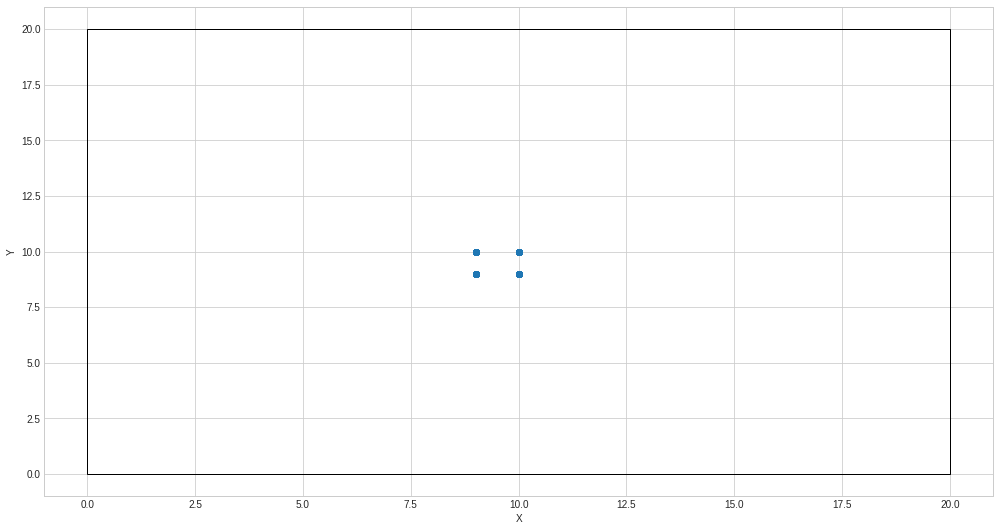

In [37]:
step = 0
p = 0.2
particles = generate_particles([[9, 9, 25], [10, 9, 25], [9, 10, 25], [10, 10, 25]])
particles = final_position_2D_particles(particles, p, step)
draw_particles(particles)

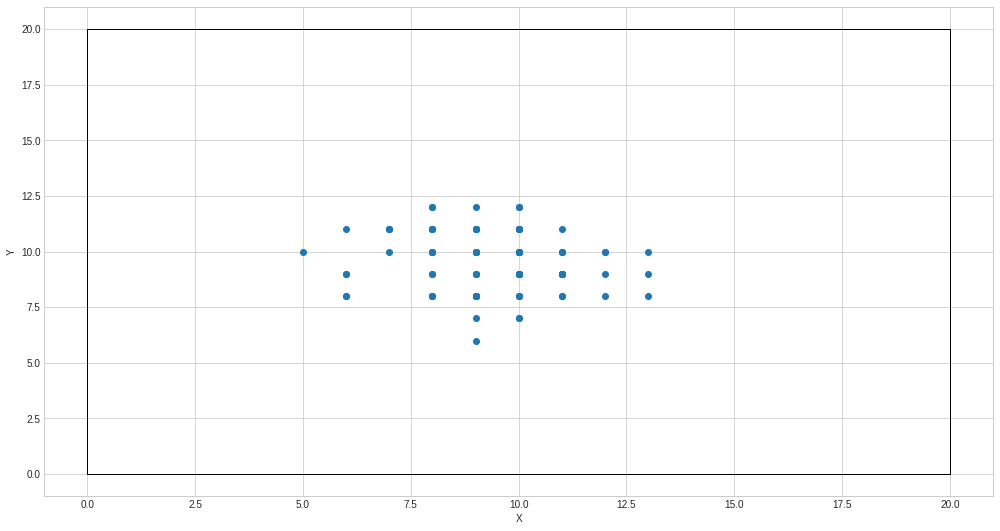

In [38]:
step = 5
particles = generate_particles([[9, 9, 25], [10, 9, 25], [9, 10, 25], [10, 10, 25]])
particles = final_position_2D_particles(particles, p, step)
draw_particles(particles)

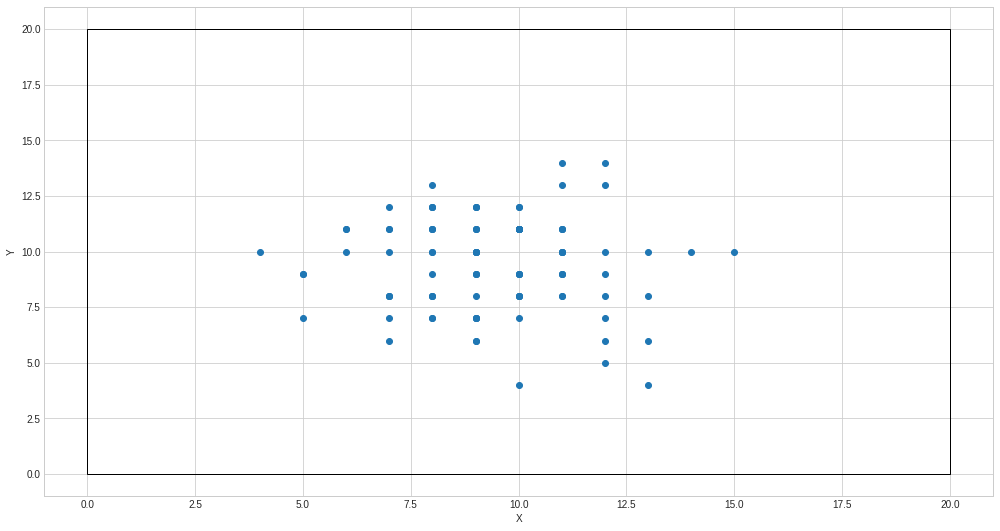

In [39]:
step = 10
particles = generate_particles([[9, 9, 25], [10, 9, 25], [9, 10, 25], [10, 10, 25]])
particles = final_position_2D_particles(particles, p, step)
draw_particles(particles)

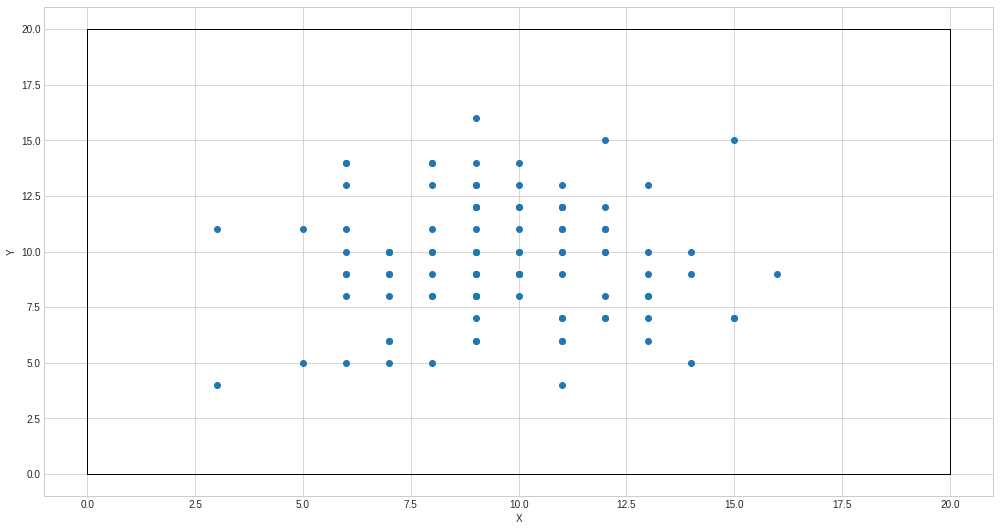

In [40]:
step = 20
particles = generate_particles([[9, 9, 25], [10, 9, 25], [9, 10, 25], [10, 10, 25]])
particles = final_position_2D_particles(particles, p, step)
draw_particles(particles)

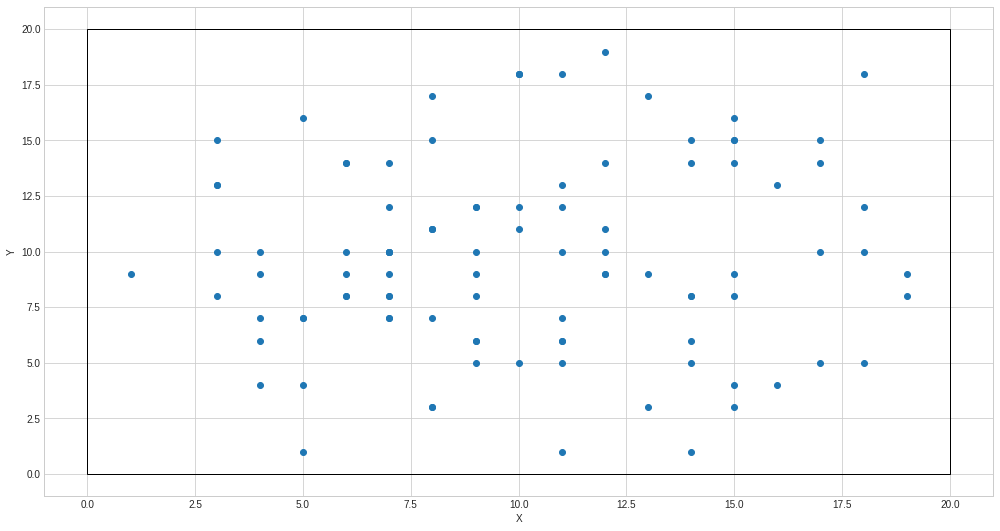

In [41]:
step = 50
particles = generate_particles([[9, 9, 25], [10, 9, 25], [9, 10, 25], [10, 10, 25]])
particles = final_position_2D_particles(particles, p, step)
draw_particles(particles)

In [42]:
# i : number particles at the given cell
# N : total number of particles in the system
# returns Pi for the given cell
def p_ratio(i: int, N: int) -> float:
    return i/N

# pi_arr : array of Pi values
# returns entropy of a system
def get_entropy(pi_arr: list) -> float:
  kb = 1.38e-23
  s = 0
  for pi in pi_arr:
    if (pi != 0):
      s += pi * np.log(pi)
  s *= -kb
  return s

In [43]:
paddle = np.zeros(40)
paddle.resize((20, 20))

In [44]:
# particles : list of particle coordinates
# returns the matrix showing the number of particles at each cell
def count_particles_on_paddle(particles: list) -> list:
  paddle = np.zeros((20,20))
  for i in particles:
    paddle[i[0]][i[1]]+=1
  return paddle


In [45]:
particles_start = generate_particles([[9, 9, 25], [10, 9, 25], [9, 10, 25], [10, 10, 25]])
steps = [5, 10, 20, 50]
N_computations = 25
entropies = {}
for step in steps:
  # array ratio of particles
  pis = np.zeros(400)
  for i in range(N_computations):
    particles = particles_start.copy()
    particles = final_position_2D_particles(particles, p, step)
    pis += count_particles_on_paddle(particles).flatten()
  # get the average of ratio of particles
  pis /= N_computations
  # calculate the entropy
  entropies[step] = get_entropy(pis)

print("Entropy at N=50 :", entropies[50])


Entropy at N=50 : 1.3709605350690961e-21


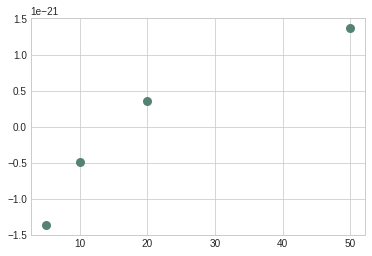

In [46]:
plt.scatter(entropies.keys(), entropies.values(), color = "#558271", linewidth=3)

[ 4.13622890e-22 -1.35742365e-21 -5.00000000e+00]


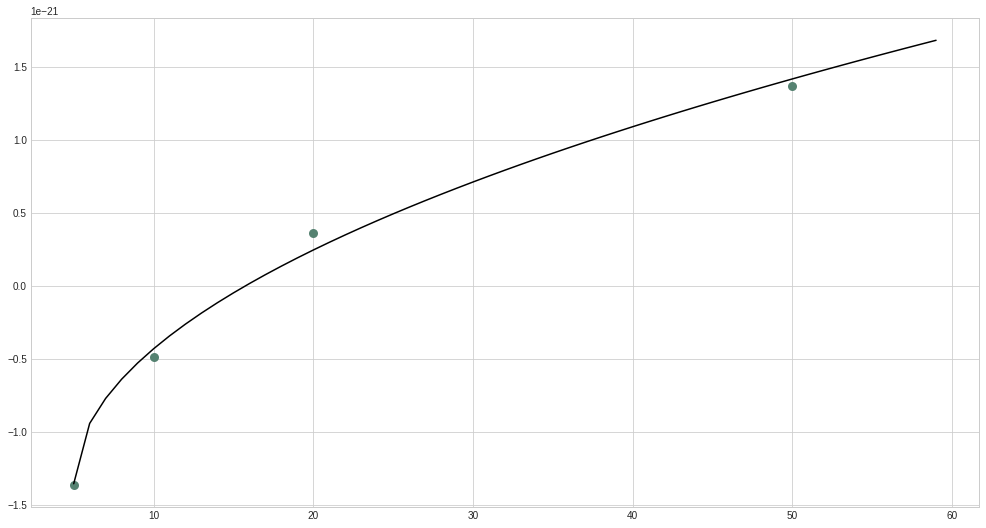

In [47]:
from scipy.optimize import curve_fit

# General sqrt function
def gen_sqrt(x, a, b, x0):
  return a*np.sqrt(np.abs(x+x0)) + b
pars, cov = curve_fit(f=gen_sqrt, xdata=list(entropies.keys()), ydata=list(entropies.values()))

print(pars)

plt.figure(figsize=(17,9)) 
plt.scatter(entropies.keys(), entropies.values(), color = "#558271", linewidth=3)
plt.plot(np.arange(5, 60), gen_sqrt(np.arange(5, 60), pars[0], pars[1], pars[2]), color='black')